In [1]:
import numpy as np 
import pandas as pd 
import json
import os
################ Change the path of the folder to where the data is located ####################
os.chdir("C:/Users/bluef4x/Desktop/UTD/BigData/Project/data")
print(os.listdir("C:/Users/bluef4x/Desktop/UTD/BigData/Project/data"))

['x', 'yelp_business.csv', 'yelp_business_attributes.csv', 'yelp_business_hours.csv', 'yelp_checkin.csv', 'yelp_review.csv', 'yelp_tip.csv', 'yelp_user.csv']


In [2]:
#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 





#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

In [3]:
import sklearn 
from sklearn.model_selection import train_test_split

C:\Users\bluef4x\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [4]:
#biz_f = open('yelp_academic_dataset_business.json',"r",encoding="utf-8")
#biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
#biz_f.close()

biz_df = pd.read_csv("yelp_business.csv")


In [5]:
biz_df.shape

(174567, 13)

In [6]:
biz_df.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [7]:
#checkin_f = open('yelp_academic_dataset_checkin.json',"r",encoding="utf-8")
#checkin_df = pd.DataFrame([json.loads(x) for x in checkin_f.readlines()])
#checkin_f.close()

checkin_df = pd.read_csv("yelp_checkin.csv")


In [8]:
checkin_df.shape

(3911218, 4)

In [9]:
checkin_df.head()

business_id weekday   hour  checkins
0  3Mc-LxcqeguOXOVT_2ZtCg     Tue   0:00        12
1  SVFx6_epO22bZTZnKwlX7g     Wed   0:00         4
2  vW9aLivd4-IorAfStzsHww     Tue  14:00         1
3  tEzxhauTQddACyqdJ0OPEQ     Fri  19:00         1
4  CEyZU32P-vtMhgqRCaXzMA     Tue  17:00         1

In [10]:
#review_f = open('yelp_academic_dataset_review.json',"r",encoding="utf-8")
#review_df = pd.DataFrame([json.loads(x) for x in review_f.readlines()])
#review_f.close()

review_df = pd.read_csv("yelp_review.csv",nrows=100000)

In [11]:
review_df.shape

(100000, 9)

In [12]:
review_df.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [13]:
#tip_f = open('yelp_academic_dataset_tip.json',"r",encoding="utf-8")
#tip_df = pd.DataFrame([json.loads(x) for x in tip_f.readlines()])
#tip_f.close()

tip_df = pd.read_csv("yelp_tip.csv")

In [14]:
tip_df.shape

(1098324, 5)

In [15]:
tip_df.head()

text        date  likes  \
0  Great breakfast large portions and friendly wa...  2015-08-12      0   
1  Nice place. Great staff.  A fixture in the tow...  2014-06-20      0   
2                     Happy hour 5-7 Monday - Friday  2016-10-12      0   
3  Parking is a premium, keep circling, you will ...  2017-01-28      0   
4             Homemade pasta is the best in the area  2017-02-25      0   

              business_id                 user_id  
0  jH19V2I9fIslnNhDzPmdkA  ZcLKXikTHYOnYt5VYRO5sg  
1  dAa0hB2yrnHzVmsCkN4YvQ  oaYhjqBbh18ZhU0bpyzSuw  
2  dAa0hB2yrnHzVmsCkN4YvQ  ulQ8Nyj7jCUR8M83SUMoRQ  
3  ESzO3Av0b1_TzKOiqzbQYQ  ulQ8Nyj7jCUR8M83SUMoRQ  
4  k7WRPbDd7rztjHcGGkEjlw  ulQ8Nyj7jCUR8M83SUMoRQ

In [16]:
#user_f = open('yelp_academic_dataset_user.json',"r",encoding="utf-8")
#user_df = pd.DataFrame([json.loads(x) for x in user_f.readlines()])
#user_f.close()

user_df = pd.read_csv("yelp_user.csv")

In [17]:
user_df.shape

(1326100, 22)

In [18]:
user_df.head()

user_id    name  review_count yelping_since  \
0  JJ-aSuM4pCFPdkfoZ34q0Q   Chris            10    2013-09-24   
1  uUzsFQn_6cXDh6rPNGbIFA   Tiffy             1    2017-03-02   
2  mBneaEEH5EMyxaVyqS-72A    Mark             6    2015-03-13   
3  W5mJGs-dcDWRGEhAzUYtoA  Evelyn             3    2016-09-08   
4  4E8--zUZO1Rr1IBK4_83fg    Lisa            11    2012-07-16   

                                             friends  useful  funny  cool  \
0  0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...       0      0     0   
1                                               None       0      0     0   
2                                               None       0      0     0   
3                                               None       0      0     0   
4                                               None       4      0     0   

   fans elite        ...          compliment_more  compliment_profile  \
0     0  None        ...                        0                   0   
1     0  None        ...                        0                   0   
2     0  None        ...                        0                   0   
3     0  None        ...                        0                   0   
4     0  None        ...                        0                   0   

   compliment_cute  compliment_list  compliment_note  compliment_plain  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   compliment_cool  compliment_funny  compliment_writer  compliment_photos  
0                0                 0                  0                  0  
1                0                 0                  0                  0  
2                0                 0                  0                  0  
3                0                 0                  0                  0  
4                0                 0                  1                  0  

[5 rows x 22 columns]

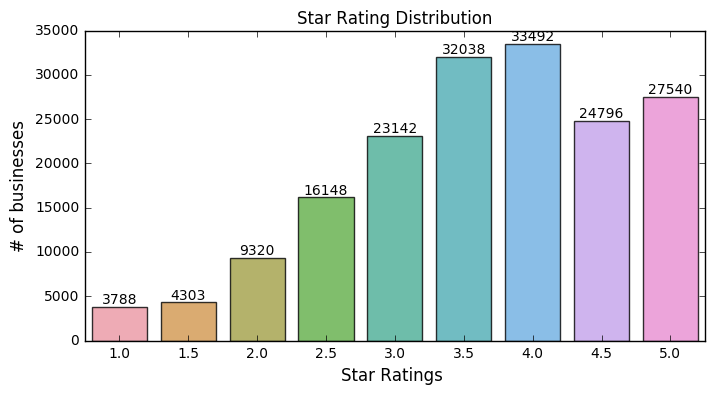

In [19]:
#Get the distribution of the ratings
x=biz_df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

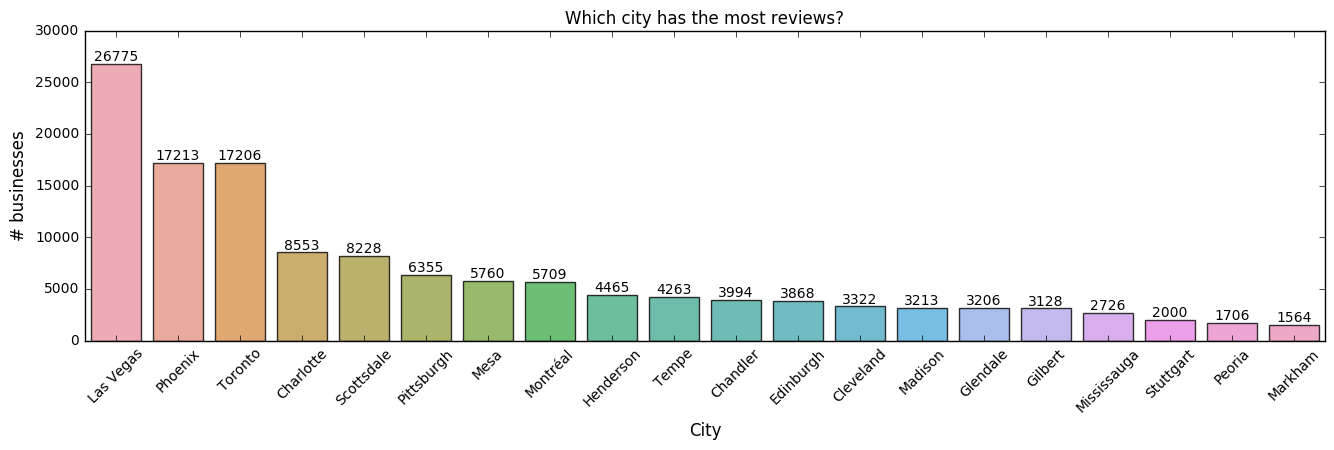

In [20]:
#Get the distribution of the ratings
x=biz_df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8 )
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [21]:
#categories of organizations
print(biz_df['categories'].str.count(',').min() + 1, biz_df['categories'].str.count(',').max() + 1)
(biz_df['categories'].str.count(',') + 1).value_counts().head()

1 1


1    174567
Name: categories, dtype: int64

In [22]:
#biz_df['categories'].fillna('missing')
#biz_df['business_id'].fillna('missing')
biz_df.replace(to_replace=[None], value='missing', inplace=True)


76419


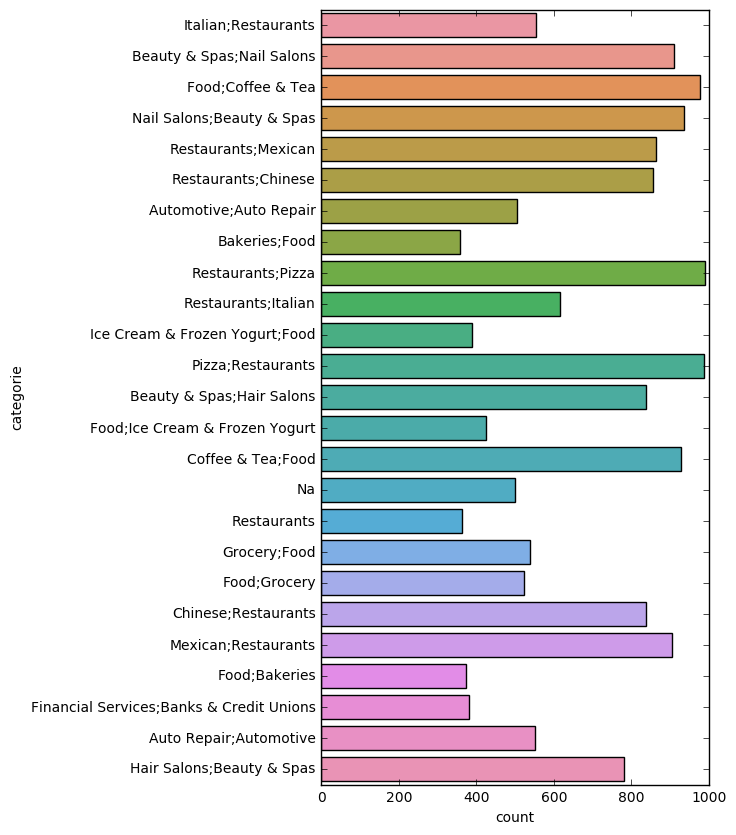

In [23]:
# categories we have
categories = pd.concat(
    [pd.Series(row['business_id'], row['categories'].split(',')) for _, row in biz_df.iterrows()]
).reset_index()
categories.columns = ['categorie', 'business_id']
categories.head()

## How many categories?
print(categories['categorie'].nunique())
## Most frequent categories
categories['categorie'].value_counts().head(10)

fig, ax = plt.subplots(figsize=[5,10])
sns.countplot(data=categories[categories['categorie'].isin(
    categories['categorie'].value_counts().head(25).index)],
                              y='categorie', ax=ax)
plt.show()

In [24]:
f,ax = plt.subplots(figsize=(14,8))
cnt = biz_df['name'].value_counts()[:20].to_frame()
sns.barplot(cnt['name'], cnt.index, palette = 'RdBu', ax =ax)
ax.set_xlabel('')
ax.set_title('Top name of store in Yelp')


In [25]:
#How many business are open
plt.figure(figsize=(14,5))
sns.countplot(biz_df['is_open'])

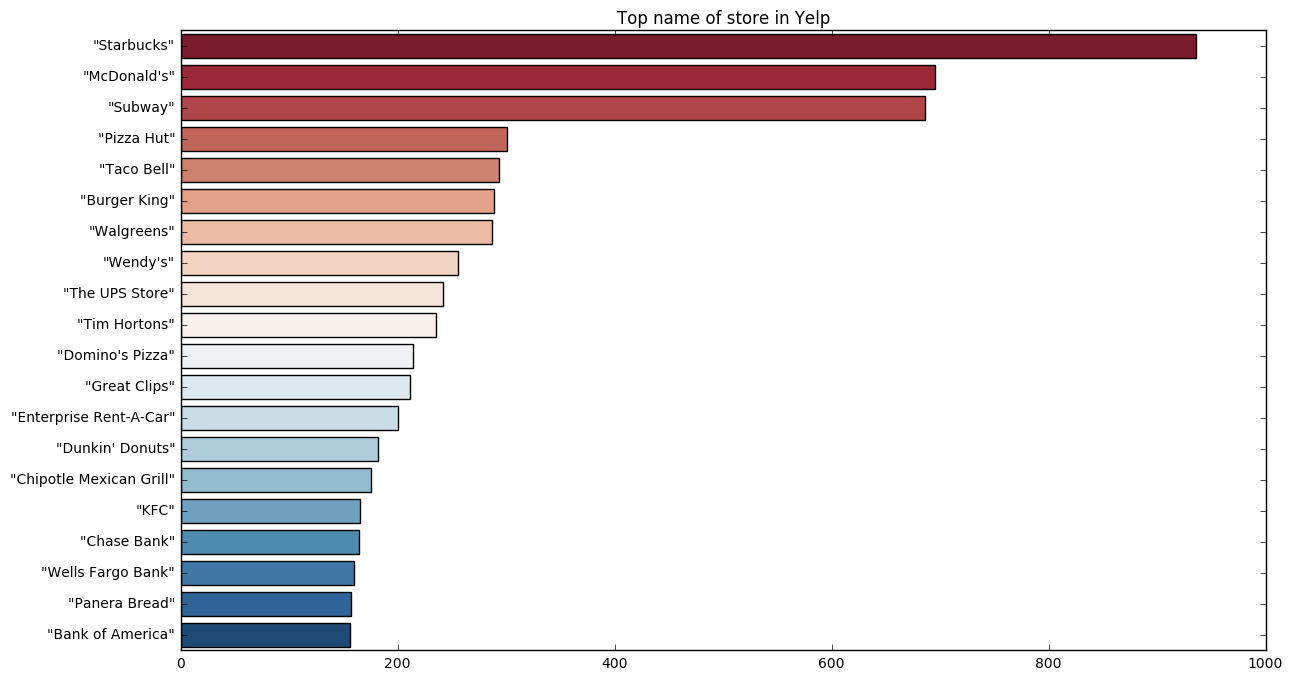

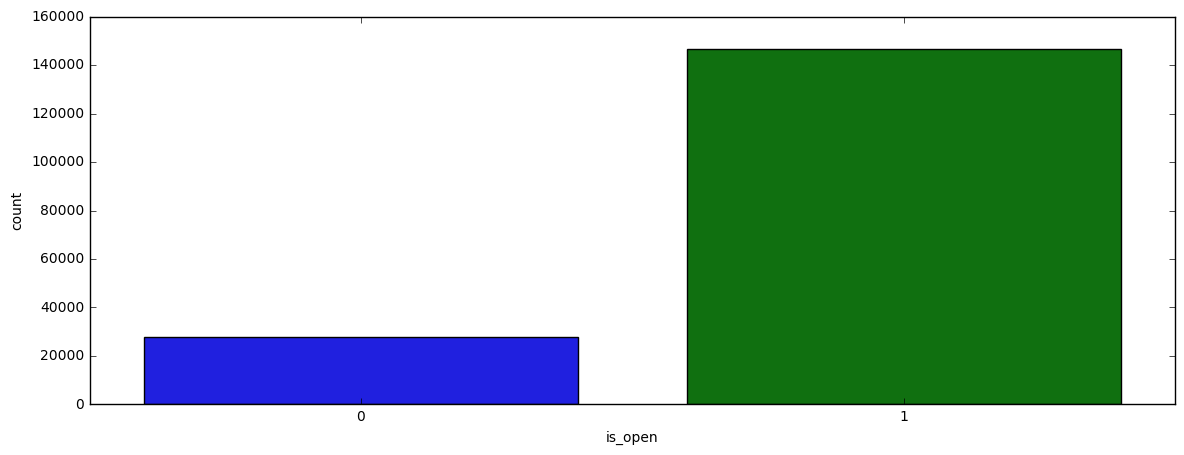

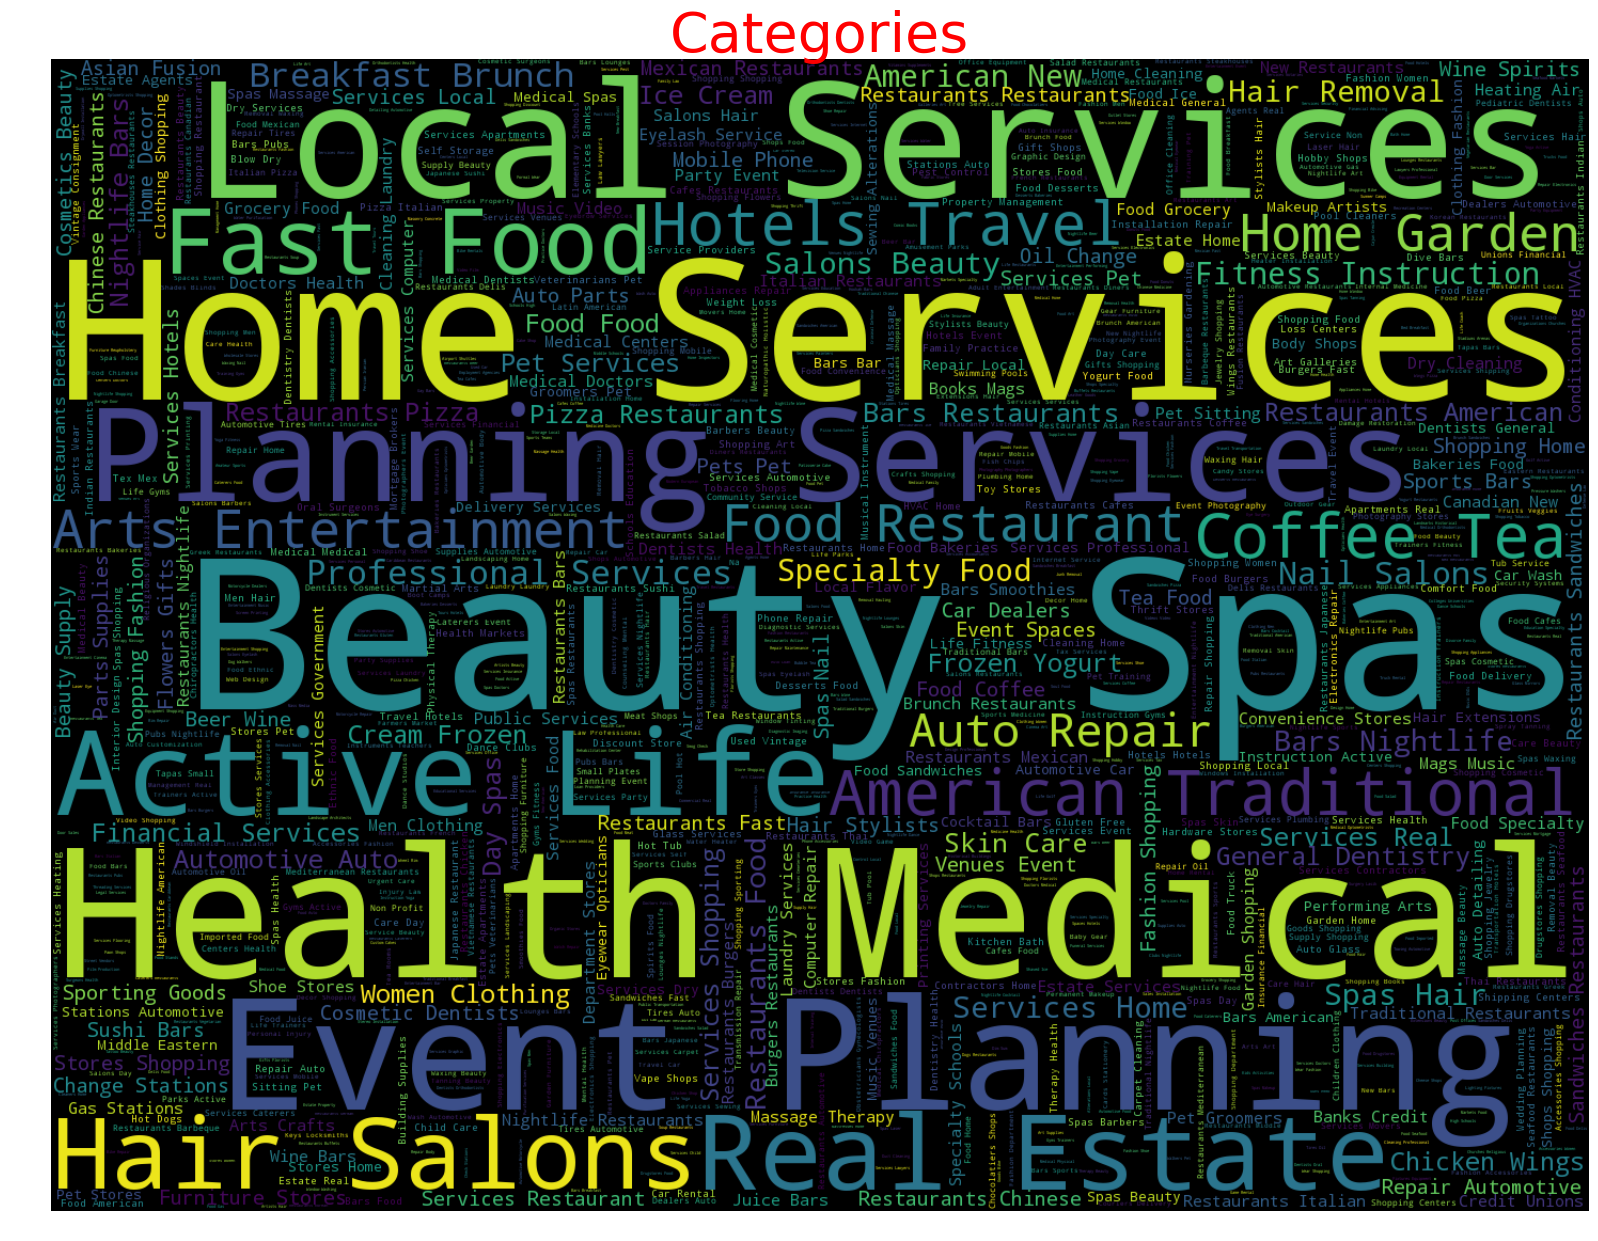

In [26]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(biz_df['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.title("Categories", fontsize=40,color='Red')
plt.imshow(cloud)
plt.axis('off');
plt.tight_layout(pad=10)
plt.show()

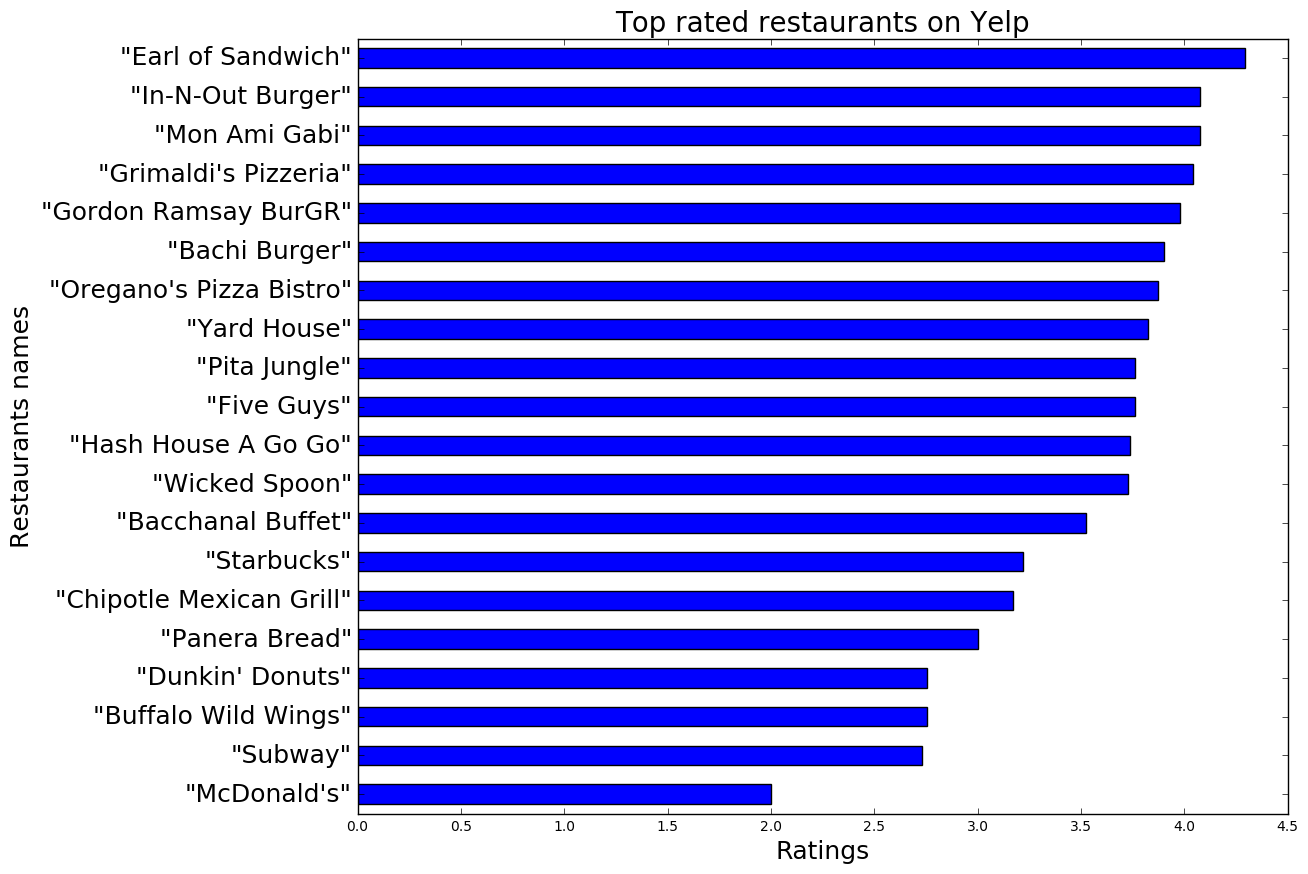

In [27]:
review_df['name'] = review_df['business_id'].map(biz_df.set_index('business_id')['name'])
top_restaurants = review_df.name.value_counts().index[:20].tolist()
df_review_top = review_df.loc[review_df['name'].isin(top_restaurants)]
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

In [28]:
# Print User Information

print('Total users:', user_df['user_id'].nunique())
print('Total users review:', review_df['user_id'].nunique())
print('Total users tip:', tip_df['user_id'].nunique())

Total users: 1326100
Total users review: 24660
Total users tip: 271679


In [29]:
#Print information regarding organizations

print('Total organization:', biz_df['business_id'].nunique())
print('Total organizations with review:', review_df['business_id'].nunique(),
      review_df['business_id'].nunique()/biz_df['business_id'].nunique())
print('Total organization with tip:', tip_df['business_id'].nunique(),
      tip_df['business_id'].nunique()/review_df['business_id'].nunique())
print('Total organizations with checkin info:', checkin_df['business_id'].nunique(),
      checkin_df['business_id'].nunique()/biz_df['business_id'].nunique())

Total organization: 174567
Total organizations with review: 45600 0.26121775593325197
Total organization with tip: 112365 2.464144736842105
Total organizations with checkin info: 146350 0.8383600565971805


In [88]:
import pandas as pd
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

TemplateAssertionError: no filter named 'tojson'

In [ ]:
lat = list(biz_df.loc[0:100000,"latitude"])
long = list(biz_df.loc[0:100000,"longitude"])
location = [(i, j) for i, j in zip(lat, long)]

In [ ]:
mapit = folium.Map( location=[33.522143, -112.36326], zoom_start=3)
for coord in location:
    folium.CircleMarker( location=[ coord[0], coord[1] ], fill_color='#43d9de', radius=1 ).add_to( mapit )

In [ ]:
df1 = biz_df[['city', 'review_count', 'categories']]
df2 = df1.sort_values(by=['review_count'], ascending=False)
df3 = df2.iloc[0:19,0:2]
x  = df3.iloc[:, 0].tolist()
y = df3.iloc[:, 1].tolist()

In [ ]:
frequencies = y
freq_series = pd.Series(frequencies)
y_labels = x

plt.figure(figsize=(20, 20))
ax = freq_series.plot(kind='barh')
ax.set_title('Cities with maximum reviews')
ax.set_xlabel('number of reviews')
ax.set_ylabel('City name')
ax.set_yticklabels(y_labels)
ax.set_xlim(0, 10000) 
rects = ax.patches
for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    
    ha = 'left'
    if x_value < 0:
    
        space *= -1
    
        ha = 'right'

    label = "{:.1f}".format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    

In [31]:
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS 
import re 
import string
import nltk # preprocessing text
from textblob import TextBlob
from stop_words import get_stop_words
from nltk.corpus import stopwords


i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these

stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stopwords_x = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))
stop_words.extend(stopwords_x)

In [32]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stop_words)]  
    return ' '.join(x)

In [33]:
#Pre processed the text of reviews dataframe and created new column
review_df['text_processed'] = review_df['text'].apply(preprocess)
review_df.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool                      name  \
0       0      0     0              "Wilensky's"   
1       0      0     0               "Tuck Shop"   
2       0      0     0           "Lester's Deli"   
3       0      0     0               "Five Guys"   
4       0      0     0  "Maison Christian Faure"   

                                      text_processed  
0  super simple place amazing nonetheless around ...  
1  small unassuming place changes menu every ofte...  
2  lesters located beautiful neighborhood since k...  
3  love coming yes place always needs floor swept...  
4  chocolate almond croissant amazing light butte...

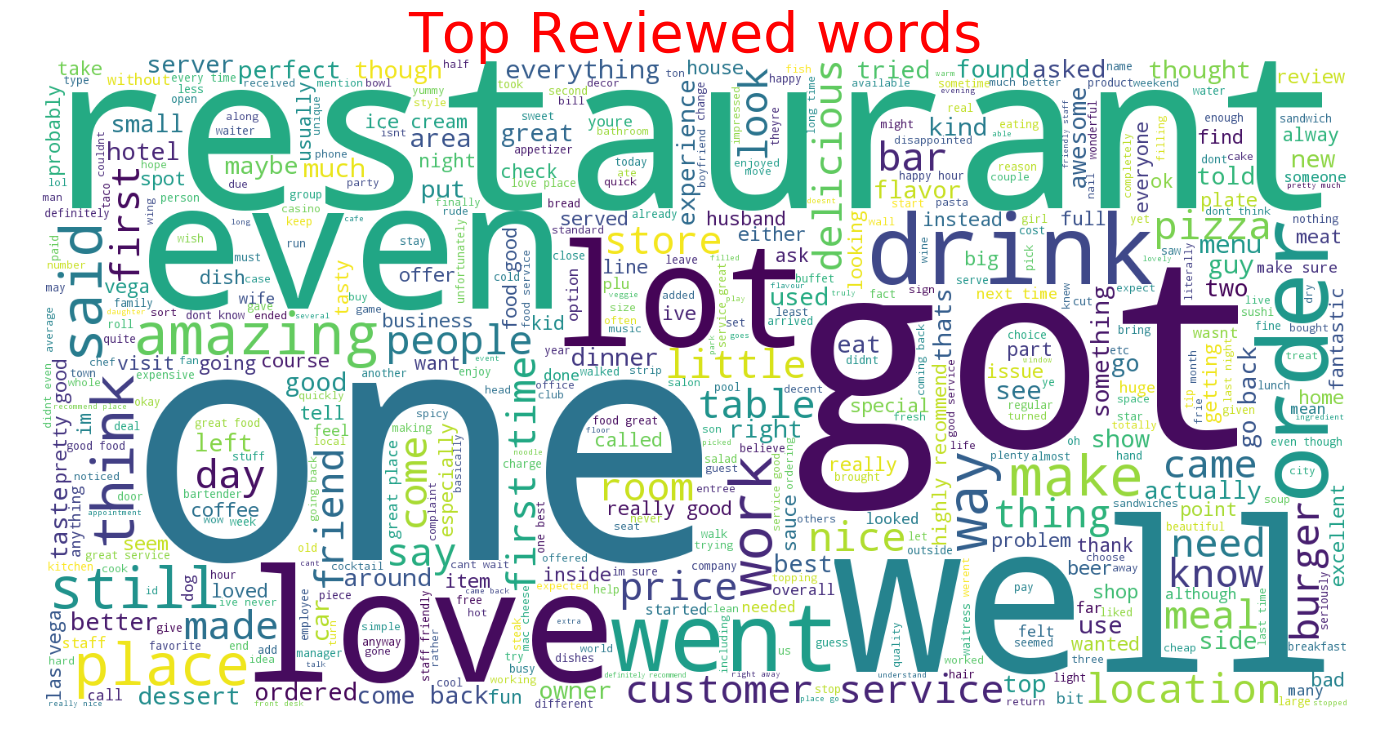

In [35]:
#Wordcloud with top reviewed words
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(review_df['text_processed'])))
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [36]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [37]:
review_df['text_sentiment'] = review_df['text_processed'].apply(sentiment)

In [38]:
review_df['sentiment'] = ''
review_df['sentiment'][review_df['text_sentiment'] > 0] = 'positive'
review_df['sentiment'][review_df['text_sentiment'] < 0] = 'negative'
review_df['sentiment'][review_df['text_sentiment'] == 0] = 'neutral'

C:\Users\bluef4x\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\bluef4x\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\bluef4x\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


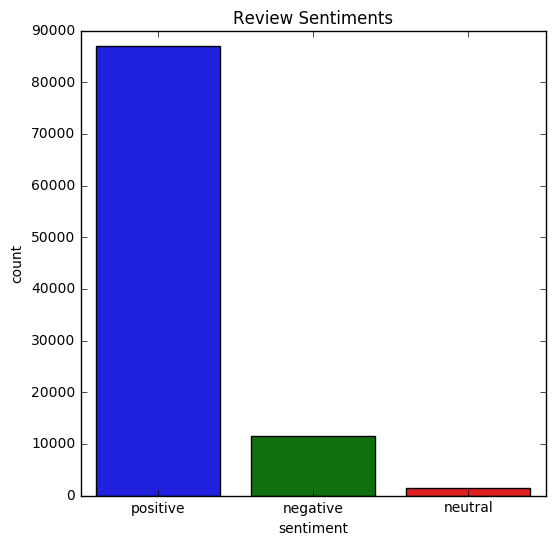

In [39]:
#Review Sentiments
plt.figure(figsize=(6,6))
ax = sns.countplot(review_df['sentiment'])
plt.title('Review Sentiments');
plt.show();

In [40]:
yelp_review_posr = pd.DataFrame(review_df['text_processed'][ review_df['sentiment'] == 'positive'])
yelp_review_negr = pd.DataFrame(review_df['text_processed'][ review_df['sentiment'] == 'negative'])
yelp_review_neutr = pd.DataFrame(review_df['text_processed'][ review_df['sentiment'] == 'neutral'])

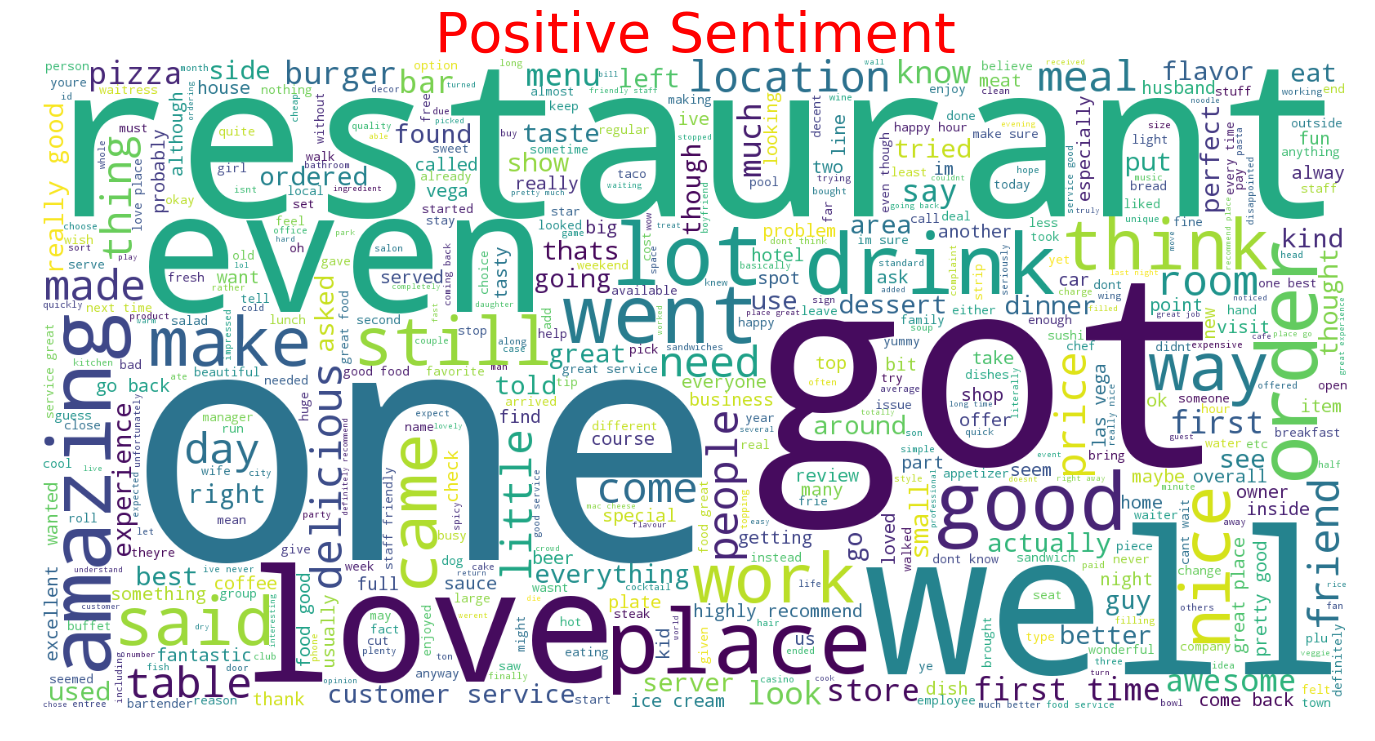

In [41]:
#Wordcloud with words of positive sentiment
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_review_posr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

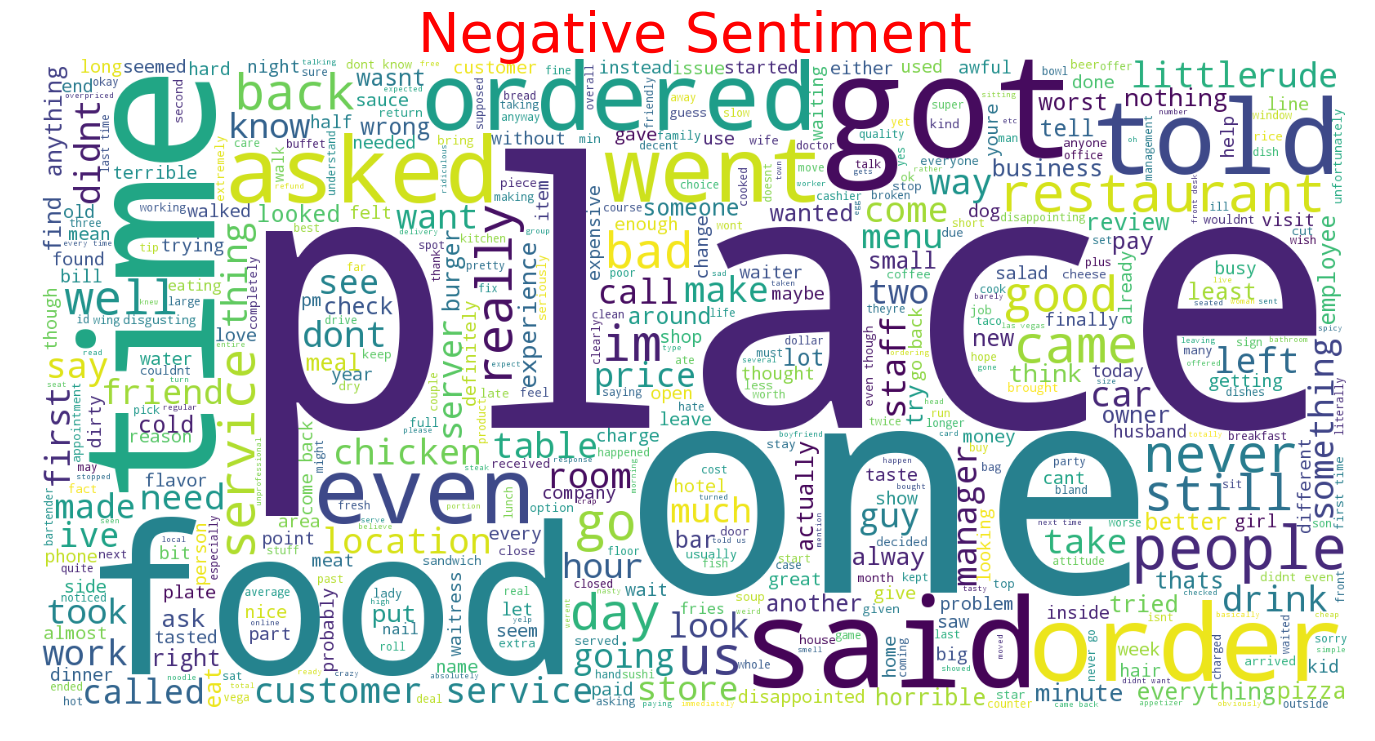

In [42]:
#Wordcloud with words of negative sentiment
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_review_negr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [43]:
#wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
#wordcloud.generate(str(set(yelp_review_neutr['text_processed'])))
# declare our figure 
#plt.figure(figsize=(20,10))
#plt.title("Neutral Sentiment", fontsize=40,color='Red')
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.tight_layout(pad=10)
#plt.show()

In [59]:
#Dataframe with review text and review star rating
review_df=review_df.dropna(axis=0,how='any')
rating_class = review_df[(review_df['stars'] == 1) | (review_df['stars'] == 5)]
X_review=rating_class['text_processed']
y_review=rating_class['stars']

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(X_review)
X_review = bow_transformer.transform(X_review)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y_review, test_size=0.3, random_state=101)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 3479   472]
 [  578 12267]]


              precision    recall  f1-score   support

           1       0.86      0.88      0.87      3951
           5       0.96      0.96      0.96     12845

   micro avg       0.94      0.94      0.94     16796
   macro avg       0.91      0.92      0.91     16796
weighted avg       0.94      0.94      0.94     16796



In [83]:
positive_review = "good food and quick service"
negative_review = "bad food and slow service"

positive_review_transformed = bow_transformer.transform([positive_review])
negative_review_transformed = bow_transformer.transform([negative_review])

print("Positive Review Rating: ")
print(nb.predict(positive_review_transformed)[0] )
print("Negative Review Rating: ")
print( nb.predict(negative_review_transformed)[0] )

Positive Review Rating: 
5
Negative Review Rating: 
1


In [87]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

X_review=rating_class['text_processed']
y_review=rating_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X_review, y_review, test_size=0.3, random_state=101)

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))


[[ 3463   488]
 [  553 12292]]


              precision    recall  f1-score   support

           1       0.86      0.88      0.87      3951
           5       0.96      0.96      0.96     12845

   micro avg       0.94      0.94      0.94     16796
   macro avg       0.91      0.92      0.91     16796
weighted avg       0.94      0.94      0.94     16796



In [ ]:
#importing all necessary packages

import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import datetime
import calendar

In [ ]:
yelp_business = pd.read_csv("F:/Fall2019/big data/project/yelp_business.csv")
yelp_business.head()

In [ ]:
## importing yelp review dataset in chunks

df_chunk = pd.read_csv("F:/Fall2019/big data/project/yelp_review.csv", iterator=True, chunksize = 10000)
yelp_review = pd.concat(df_chunk, ignore_index=True)

In [ ]:
## converting date column to date-time format

yelp_review['date'] = pd.to_datetime(yelp_review.date)

In [ ]:
## adding a new column year from the given date

yelp_review['year'] = pd.DatetimeIndex(yelp_review['date']).year
yelp_review.head()

In [ ]:
## dropping unncecssary columns
yelp_reviewnew = yelp_review.drop(columns=['review_id', 'user_id', 'text', 'useful', 'funny', 'cool'])

In [ ]:
## shortlisting top five highly rated businesses

yelp_reviewstars = yelp_reviewnew.drop(columns = ['date']) # dropping date column
# grouped_review = yelp_reviewstars.groupby(['business_id', 'stars']).size() # g
five = yelp_reviewstars['stars'] == 5 # creating a series with only five star reviews
fivebusi = yelp_reviewnew[five] # creating 
top_busi = fivebusi.groupby(['business_id']).size()
topfive = fivebusi.groupby(['business_id'])["stars"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
topfive

In [ ]:
## Creating a time series graph of top rated business, average reviews by days as well as time series for 1 year

first = yelp_reviewnew["business_id"] == "4JNXUYY8wbaaDmk3BPzlWw"
reviewfirst = yelp_reviewnew[first]
reviewfirst['date'] = pd.to_datetime(reviewfirst.date)
#review_by_date = reviewfirst.groupby(["date"]).mean()
review_by_date = reviewfirst.groupby(['date'])["stars"].mean().reset_index(name='mean').sort_values(['mean'], ascending=False)
#review_by_date["date"] = review_by_date["date"].astype("str")
day = pd.DataFrame([calendar.day_name[review_by_date.loc[i,"date"].weekday()] for i in range(2826)])
review_by_day = pd.concat([review_by_date, day], axis=1)
review_by_day.columns = ["date", "mean rating", "day"]
review_by_day = review_by_day.groupby(['day'])["mean rating"].mean().reset_index(name='mean')

#review_by_day = review_by_day.sort_values("date")
fig = px.line(x = review_by_day["day"], y = review_by_day["mean"])
fig.update_yaxes(nticks=20)
fig.update_layout(
    width = 1000,
    height = 300,
    title = "Average Rating Per Day (Mon Ami Gabi)",
    xaxis_title="Day",
    yaxis_title="Average Rating",
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)

fig.show()

In [ ]:
yelp_business[yelp_business["business_id"] =="4JNXUYY8wbaaDmk3BPzlWw"].head(1)

In [ ]:
yelp_business[yelp_business["business_id"] =="4JNXUYY8wbaaDmk3BPzlWw"].head(1)

In [ ]:
## creating a time series plot of ratings
twoyears = reviewfirst.sort_values("date").tail(730)
#review_by_day = review_by_day.sort_values("date")
fig = px.line(x = twoyears["date"], y = twoyears["stars"])
fig.update_yaxes(nticks=30)
fig.update_layout(
    width = 1000,
    height = 300,
    title = "Rating by Date (Mon Ami Gabi)",
    xaxis_title="Date",
    yaxis_title="Rating",
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)

fig.show()

In [ ]:
## shortlisting top rated businesses
top_reviewed = yelp_review[yelp_review["stars"]>3]

In [ ]:
## creating a new df with top rated businesses having columns business_id and ratings
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

In [ ]:
## creating a plot of top rated businesses

top_count= 10
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

In [ ]:
## creating a new df with least rated businesses having columns business_id and ratings


bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

In [ ]:
## creating a plot of least rated businesses
top_count= 10
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)

In [ ]:
## 1 top rated business with reviews

num_business = 1
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values

In [ ]:
for i, business_id in enumerate(business_ids):
    useful_b = yelp_review.loc[yelp_review['business_id'] == business_id]
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values, index=useful_b["year"].values, name='Review trend')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()

In [ ]:
## pie chart of bottom rated categories

num_cat = 5 
bottom_business = 20
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]

Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
bottom_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
bottom_categories.reset_index(inplace=True)
bottom_categories.columns = ['category', 'occurance']

x_val=bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Categories')
series.plot.pie(figsize=(10, 10),startangle=90)

In [ ]:
## 20 least reviewed businesses

bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

In [ ]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)

In [ ]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)